In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data_analysis_codes.tools import LinData
from data_analysis_codes.tools import GetVars_Plot2d as GVar
from data_analysis_codes.tools import ReadingTools as RRead
param = RRead.read_parameters('pflrw_d3e2_L1821_t1_N32_LCDM')
Lin = LinData.LinData_Class(param)
get_var = GVar.Get_var(param, Lin)

 read time file


In [2]:
it_file_name = param['h5datapath'] + param['simname']
it = 0
f = h5py.File('{}_it_{:06d}.hdf5'.format(it_file_name, it), 'r')
delta = get_var.get_the_rho(f, it)['drho']

In [3]:
N = param['Nx']

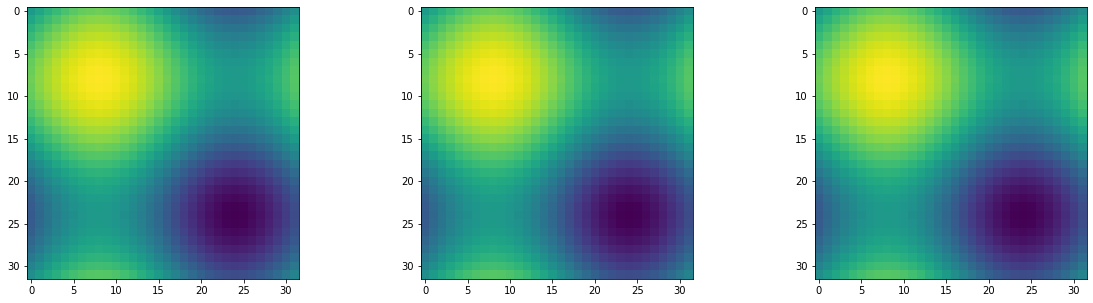

In [4]:
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.imshow(delta[int(N/4), :, :])
plt.subplot(132)
plt.imshow(delta[:, int(N/4), :])
plt.subplot(133)
plt.imshow(delta[:, :, int(N/4)])

In [5]:
np.where(delta==np.max(delta))

(array([8]), array([8]), array([8]))

In [6]:
#shift
delta = np.append(delta[int(3*N/4):, :, :], delta[:int(3*N/4), :, :], axis=0)
delta = np.append(delta[:, int(3*N/4):, :], delta[:, :int(3*N/4), :], axis=1)
delta = np.append(delta[:, :, int(3*N/4):], delta[:, :, :int(3*N/4)], axis=2)

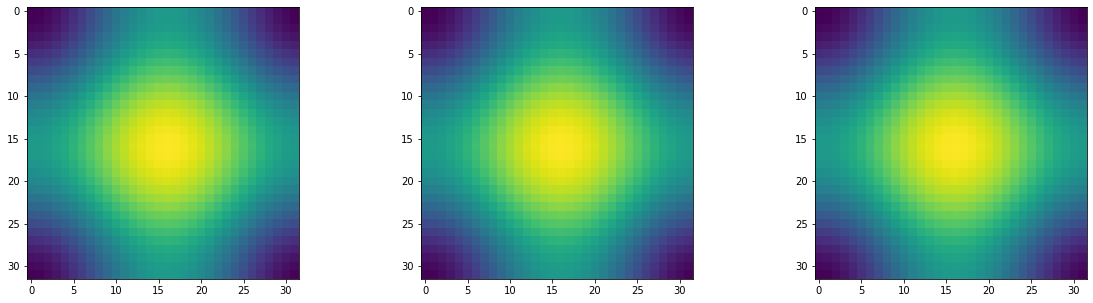

In [7]:
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.imshow(delta[int(N/4), :, :])
plt.subplot(132)
plt.imshow(delta[:, int(N/4), :])
plt.subplot(133)
plt.imshow(delta[:, :, int(N/4)])

In [8]:
np.where(delta==np.max(delta))

(array([16]), array([16]), array([16]))

In [61]:
#unshift
delta = np.append(delta[int(N/4):, :, :], delta[:int(N/4), :, :], axis=0)
delta = np.append(delta[:, int(N/4):, :], delta[:, :int(N/4), :], axis=1)
delta = np.append(delta[:, :, int(N/4):], delta[:, :, :int(N/4)], axis=2)

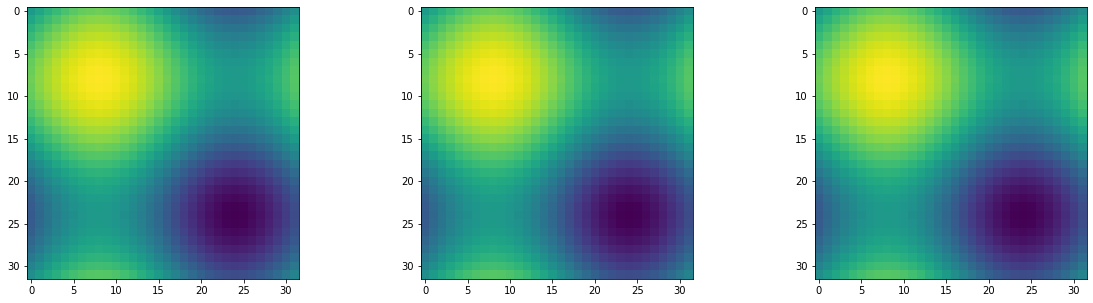

In [62]:
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.imshow(delta[int(N/4), :, :])
plt.subplot(132)
plt.imshow(delta[:, int(N/4), :])
plt.subplot(133)
plt.imshow(delta[:, :, int(N/4)])

In [63]:
np.where(delta==np.max(delta))

(array([8]), array([8]), array([8]))

In [9]:
sim32 = RRead.read_parameters('pflrw_d3e2_L1821_t1_N32_LCDM')
sim64 = RRead.read_parameters('pflrw_d3e2_L1821_t1_N64_LCDM')
sim128 = RRead.read_parameters('pflrw_d3e2_L1821_t1_N128_LCDM')

In [43]:
f32 = pd.read_table(sim32['datapath']+'/new_mass_radius_evo.csv', delimiter=',')
f64 = pd.read_table(sim64['datapath']+'/new_mass_radius_evo.csv', delimiter=',')
f128 = pd.read_table(sim128['datapath']+'/new_mass_radius_evo.csv', delimiter=',')

In [44]:
radius_denominator = np.append(np.arange(3, 11, 1), np.arange(20, 128, 10))
Radius = [sim128['Lx'] / i for i in radius_denominator]

In [45]:
Mass_prop32 = np.array([f32['Mass_prop_'+str(rd)][0] for rd in radius_denominator])
Mass_prop64 = np.array([f64['Mass_prop_'+str(rd)][0] for rd in radius_denominator])
Mass_prop128 = np.array([f128['Mass_prop_'+str(rd)][0] for rd in radius_denominator])
Mass32 = np.array([f32['Mass_'+str(rd)][0] for rd in radius_denominator])
Mass64 = np.array([f64['Mass_'+str(rd)][0] for rd in radius_denominator])
Mass128 = np.array([f128['Mass_'+str(rd)][0] for rd in radius_denominator])

In [46]:
def get_error(f32, f64, f128):
    c = RRead.safe_division(abs(f32-f64), abs(f64-f128))
    #print(c)
    err = abs((f64-f128)/(c-1))
    return err

Text(0, 0.5, 'Mass')

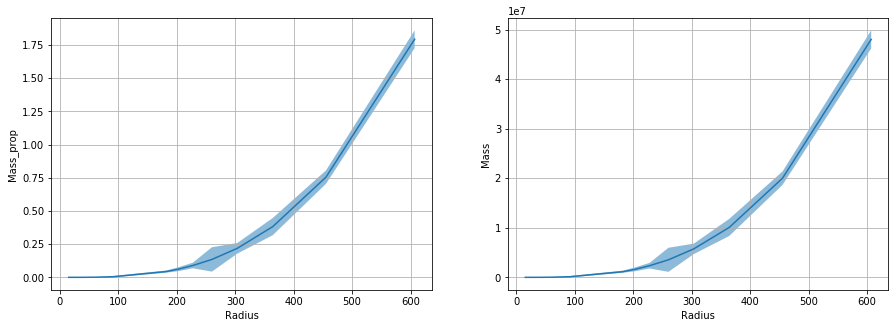

In [47]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(Radius, Mass_prop128)
err = get_error(Mass_prop32, Mass_prop64, Mass_prop128)
plt.fill_between(Radius, Mass_prop128-err, Mass_prop128+err, alpha=0.5)
plt.grid()
plt.xlabel('Radius')
plt.ylabel('Mass_prop')

plt.subplot(122)
plt.plot(Radius, Mass128)
err = get_error(Mass32, Mass64, Mass128)
plt.fill_between(Radius, Mass128-err, Mass128+err, alpha=0.5)
plt.grid()
plt.xlabel('Radius')
plt.ylabel('Mass')